![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


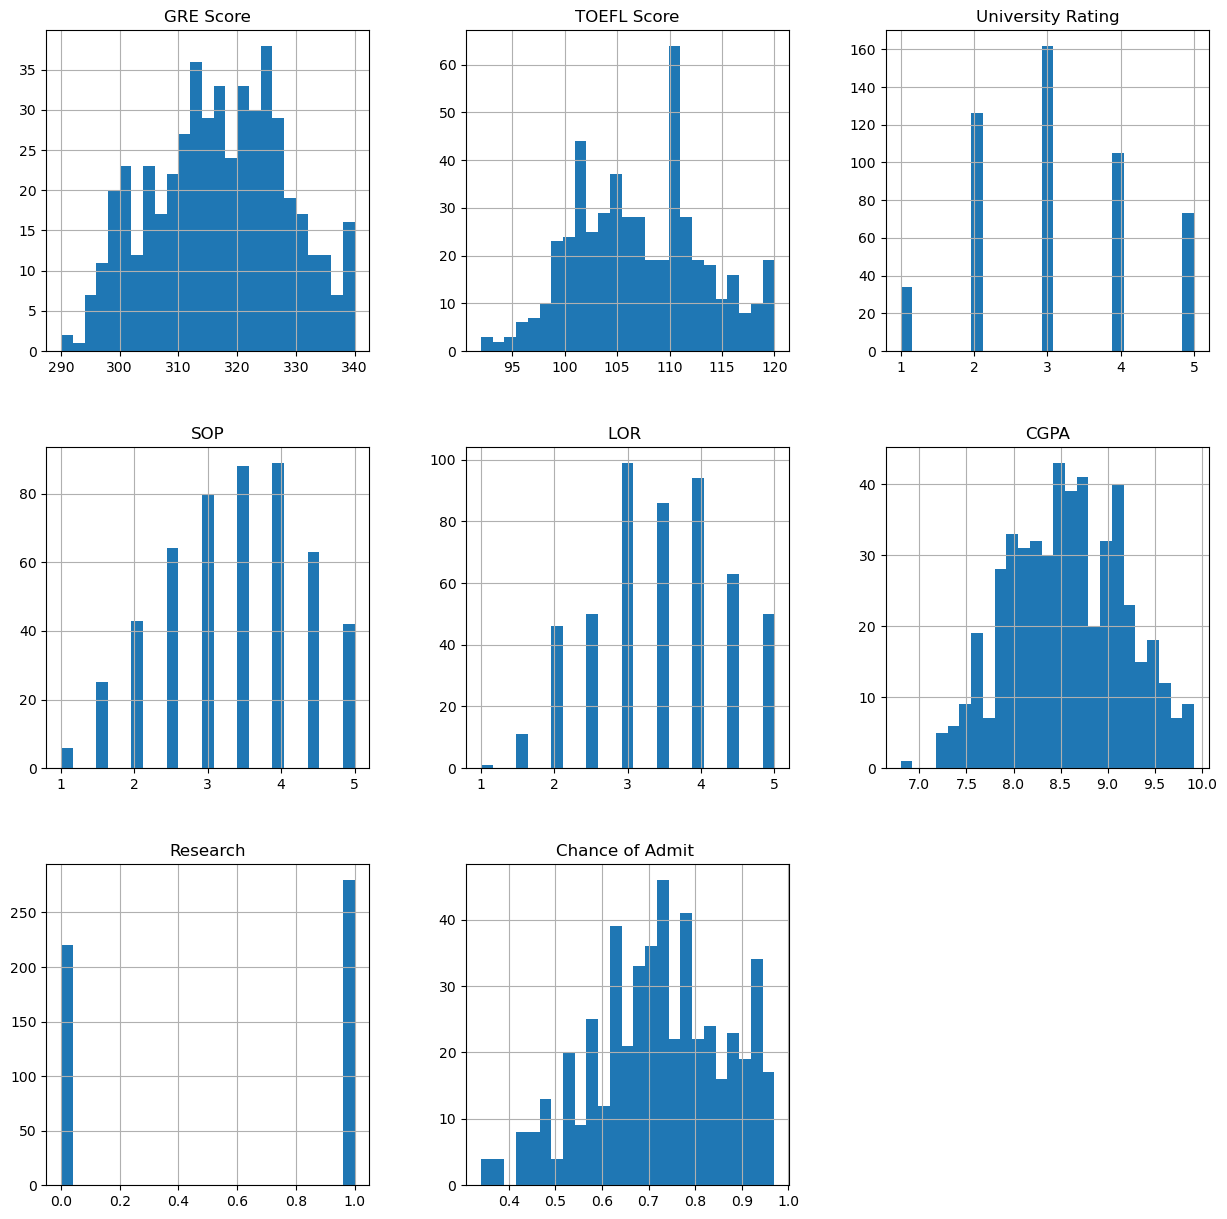

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Epoch 1/100
11/11 [==============================] - 2s 44ms/step - loss: 764.9915 - val_loss: 420.2555
Epoch 2/100
11/11 [==============================] - 0s 15ms/step - loss: 239.8510 - val_loss: 84.9623
Epoch 3/100
11/11 [==============================] - 0s 15ms/step - loss: 32.3308 - val_loss: 2.8619
Epoch 4/100
11/11 [==============================] - 0s 12ms/step - loss: 3.1758 - val_loss: 6.3917
Epoch 5/100
11/11 [==============================] - 0s 16ms/step - loss: 7.2841 - val_loss: 5.4036
Epoch 6/100
11/11 [==============================] - 0s 14ms/step - loss: 3.5781 - val_loss: 1.7655
Epoch 7/100
11/11 [==============================] - 0s 15ms/step - loss: 1.4756 - val_loss: 1.6484
Epoch 8/100
11/11 [==============================] - 0s 16ms/step - loss: 1.5102 - val_loss: 1.7128
Epoch 9/100
11/11 [==============================] - 0s 13ms/step - loss: 1.4267 - val_loss: 1.5205
Epoch 10/100
11/11 [==============================] - 0s 14ms/step - loss: 1.3518 - val_loss

11/11 [==============================] - 0s 12ms/step - loss: 0.8991 - val_loss: 0.9868
Epoch 83/100
11/11 [==============================] - 0s 13ms/step - loss: 0.8928 - val_loss: 0.9762
Epoch 84/100
11/11 [==============================] - 0s 18ms/step - loss: 0.8864 - val_loss: 0.9643
Epoch 85/100
11/11 [==============================] - 0s 17ms/step - loss: 0.8800 - val_loss: 0.9616
Epoch 86/100
11/11 [==============================] - 0s 17ms/step - loss: 0.8843 - val_loss: 0.9486
Epoch 87/100
11/11 [==============================] - 0s 17ms/step - loss: 0.8611 - val_loss: 0.9600
Epoch 88/100
11/11 [==============================] - 0s 18ms/step - loss: 0.8614 - val_loss: 0.9332
Epoch 89/100
11/11 [==============================] - 0s 18ms/step - loss: 0.8531 - val_loss: 0.9344
Epoch 90/100
11/11 [==============================] - 0s 18ms/step - loss: 0.8452 - val_loss: 0.9163
Epoch 91/100
11/11 [==============================] - 0s 17ms/step - loss: 0.8342 - val_loss: 0.9138
Epo

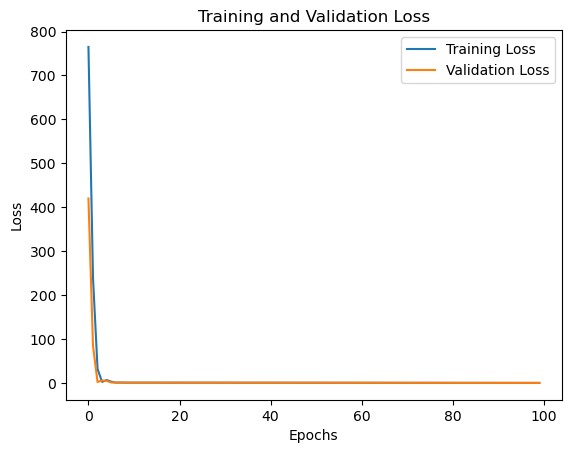

5/5 [==============================] - 0s 5ms/step
Error Absoluto Medio (MAE): 0.7483369027038417
Error Cuadrático Medio (MSE): 0.8498242976372736


In [13]:
# Celda 1
# Definición del modelo de una capa
model = Sequential()
# Capa oculta con 16 neuronas y función de activación ReLU
model.add(Dense(16, activation='relu', input_dim=xTrain.shape[1]))
# Capa de salida para predecir la probabilidad
model.add(Dense(1, activation='linear'))

# Compilación del modelo con función de pérdida MSE y optimizador Adam
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenamiento del modelo con validación
history = model.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=100, verbose=1)

# Gráficos de pérdida para entrenamiento y validación
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Cálculo de métricas de error para el set de prueba
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predicciones para el set de prueba
yPred = model.predict(xTest)

# Cálculo de MAE y MSE
mae_unacapa = mean_absolute_error(yTest, yPred)
mse_unacapa = mean_squared_error(yTest, yPred)

print(f'Error Absoluto Medio (MAE): {mae_unacapa}')
print(f'Error Cuadrático Medio (MSE): {mse_unacapa}')


Se seleccionó un número de épocas de 100, considerado suficiente para permitir que el modelo alcance una convergencia razonable. Observando el gráfico de pérdida, se puede ver que la pérdida tanto en el conjunto de entrenamiento como en el de validación disminuye rápidamente durante las primeras épocas y luego se estabiliza, lo que indica que el modelo está convergiendo. El MAE (Error Absoluto Medio) y el MSE (Error Cuadrático Medio) obtenidos indican que el modelo tiene un rendimiento aceptable para predecir la probabilidad de admisión de los estudiantes.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Epoch 1/100
11/11 [==============================] - 2s 46ms/step - loss: 1.3066 - val_loss: 0.3944
Epoch 2/100
11/11 [==============================] - 0s 15ms/step - loss: 0.3615 - val_loss: 0.1627
Epoch 3/100
11/11 [==============================] - 0s 16ms/step - loss: 0.2045 - val_loss: 0.1646
Epoch 4/100
11/11 [==============================] - 0s 16ms/step - loss: 0.1355 - val_loss: 0.1320
Epoch 5/100
11/11 [==============================] - 0s 15ms/step - loss: 0.1116 - val_loss: 0.1208
Epoch 6/100
11/11 [==============================] - 0s 15ms/step - loss: 0.1038 - val_loss: 0.1201
Epoch 7/100
11/11 [==============================] - 0s 13ms/step - loss: 0.1026 - val_loss: 0.1136
Epoch 8/100
11/11 [==============================] - 0s 18ms/step - loss: 0.1173 - val_loss: 0.1091
Epoch 9/100
11/11 [==============================] - 0s 12ms/step - loss: 0.1339 - val_loss: 0.1289
Epoch 10/100
11/11 [==============================] - 0s 17ms/step - loss: 0.1312 - val_loss: 0.2068

11/11 [==============================] - 0s 13ms/step - loss: 0.0267 - val_loss: 0.0364
Epoch 83/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0389 - val_loss: 0.0213
Epoch 84/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0486 - val_loss: 0.0358
Epoch 85/100
11/11 [==============================] - 0s 15ms/step - loss: 0.0265 - val_loss: 0.0200
Epoch 86/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0186 - val_loss: 0.0153
Epoch 87/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0159 - val_loss: 0.0173
Epoch 88/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0156 - val_loss: 0.0214
Epoch 89/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0164 - val_loss: 0.0148
Epoch 90/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0149 - val_loss: 0.0166
Epoch 91/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0252 - val_loss: 0.0191
Epo

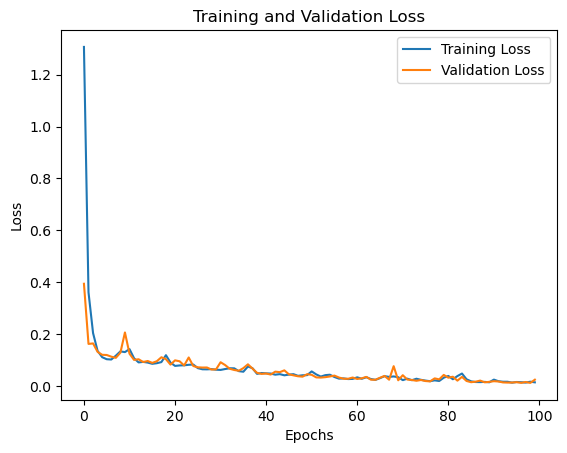

5/5 [==============================] - 0s 6ms/step
Error Absoluto Medio (MAE) Dos Capas: 0.1388358030319214
Error Cuadrático Medio (MSE) Dos Capas: 0.024920130726390297


In [14]:
# Celda 2
# Definición del modelo de dos capas
model = Sequential()
# Primera capa oculta con 32 neuronas y función de activación ReLU
model.add(Dense(32, activation='relu', input_dim=xTrain.shape[1]))
# Segunda capa oculta con 16 neuronas y función de activación ReLU
model.add(Dense(16, activation='relu'))
# Capa de salida para predecir la probabilidad
model.add(Dense(1, activation='linear'))

# Compilación del modelo con función de pérdida MSE y optimizador Adam
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenamiento del modelo con validación
history = model.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=100, verbose=1)

# Gráficos de pérdida para entrenamiento y validación
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Cálculo de métricas de error para el set de prueba
yPred = model.predict(xTest)

mae_doscapas = mean_absolute_error(yTest, yPred)
mse_doscapas = mean_squared_error(yTest, yPred)

print(f'Error Absoluto Medio (MAE) Dos Capas: {mae_doscapas}')
print(f'Error Cuadrático Medio (MSE) Dos Capas: {mse_doscapas}')


Se seleccionaron 100 épocas para asegurar que el modelo alcanzara su mejor rendimiento y se ajustara bien tanto a los datos de entrenamiento como a los de validación. Esto se evidencia en el gráfico de pérdida, donde se observa que la pérdida disminuye y se estabiliza después de alrededor de 40 épocas, indicando que el modelo ha convergido. Aunque la pérdida se estabilizó, se decidió continuar entrenando hasta las 100 épocas para garantizar que el modelo no estuviera subentrenado y maximizar su rendimiento.

Seleccionamos 32 neuronas para la primera capa oculta y 16 para la segunda capa oculta debido a un equilibrio entre la capacidad del modelo para capturar relaciones complejas en los datos y evitar el sobreajuste. 

Luego evaluamos el modelo en el conjunto de prueba, obteniendo un Error Absoluto Medio (MAE) de aproximadamente 0.14 y un Error Cuadrático Medio (MSE) de aproximadamente 0.02, lo que indica un buen desempeño en la predicción de la probabilidad de admisión de los estudiantes.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Epoch 1/100
11/11 [==============================] - 3s 46ms/step - loss: 643.2025 - val_loss: 0.0268
Epoch 2/100
11/11 [==============================] - 0s 16ms/step - loss: 221.3276 - val_loss: 3.4225
Epoch 3/100
11/11 [==============================] - 0s 18ms/step - loss: 178.9412 - val_loss: 2.7642
Epoch 4/100
11/11 [==============================] - 0s 19ms/step - loss: 76.8325 - val_loss: 0.9618
Epoch 5/100
11/11 [==============================] - 0s 18ms/step - loss: 62.4048 - val_loss: 0.4284
Epoch 6/100
11/11 [==============================] - 0s 19ms/step - loss: 55.1972 - val_loss: 0.1479
Epoch 7/100
11/11 [==============================] - 0s 18ms/step - loss: 44.3270 - val_loss: 0.0681
Epoch 8/100
11/11 [==============================] - 0s 18ms/step - loss: 37.3882 - val_loss: 0.0384
Epoch 9/100
11/11 [==============================] - 0s 19ms/step - loss: 32.0542 - val_loss: 0.0246
Epoch 10/100
11/11 [==============================] - 0s 18ms/step - loss: 26.9347 - val

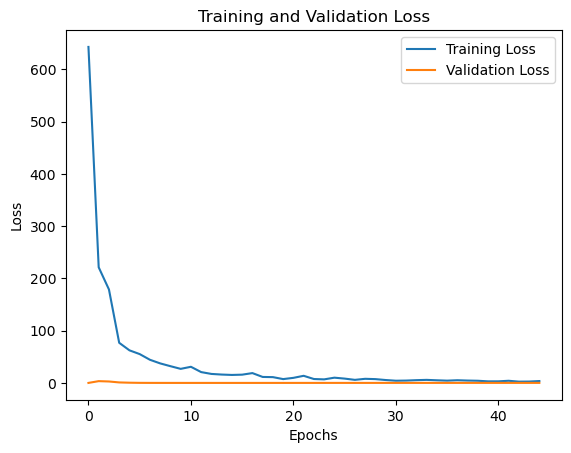

5/5 [==============================] - 0s 8ms/step
Error Absoluto Medio (MAE) Multi: 0.09701878468195599
Error Cuadrático Medio (MSE) Multi: 0.01546729522512732


In [15]:
# Celda 3
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

# Definición del modelo con Dropout
model = Sequential()
# Primera capa oculta con 64 neuronas y Dropout
model.add(Dense(64, activation='relu', input_dim=xTrain.shape[1]))
model.add(Dropout(0.3))
# Segunda capa oculta con 32 neuronas y Dropout
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
# Tercera capa oculta con 16 neuronas y Dropout
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Capa de salida para predecir la probabilidad
model.add(Dense(1, activation='linear'))

# Compilación del modelo con función de pérdida MSE y optimizador Adam
model.compile(loss='mean_squared_error', optimizer='adam')

# Configuración de Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Entrenamiento del modelo con validación y Early Stopping
history = model.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=100, callbacks=[early_stopping], verbose=1)

# Gráficos de pérdida para entrenamiento y validación
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Cálculo de métricas de error para el set de prueba
yPred = model.predict(xTest)

mae_multicapa = mean_absolute_error(yTest, yPred)
mse_multicapa = mean_squared_error(yTest, yPred)

print(f'Error Absoluto Medio (MAE) Multi: {mae_multicapa}')
print(f'Error Cuadrático Medio (MSE) Multi: {mse_multicapa}')


Se optó por entrenar el modelo durante 100 épocas para asegurar que alcance su mejor rendimiento y no esté subentrenado. Aunque la pérdida en el conjunto de entrenamiento y validación se estabiliza después de aproximadamente 40 épocas, continuar el entrenamiento permite capturar patrones más sutiles en los datos y mejorar el rendimiento general del modelo.

En cuanto al número de neuronas en cada capa oculta, se seleccionaron 64 neuronas para la primera capa, 32 para la segunda y 16 para la tercera. Esta elección busca equilibrar la capacidad del modelo para capturar relaciones complejas en los datos sin incurrir en sobreajuste.

Se incorporó dropout en cada capa oculta con una tasa del 30% para regularizar el modelo y evitar el sobreajuste. El early stopping se configuró para monitorear la pérdida en el conjunto de validación y detener el entrenamiento si la pérdida no disminuye durante 30 épocas consecutivas. Esta elección se justifica por el deseo de prevenir el sobreajuste y permitir que el modelo conserve los mejores pesos durante un período suficientemente largo de inactividad.

Las métricas de evaluación del modelo en el conjunto de prueba muestran un error absoluto medio (MAE) de aproximadamente 0.097 y un error cuadrático medio (MSE) de aproximadamente 0.015, indicando un buen desempeño en la predicción de la probabilidad de admisión de los estudiantes.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

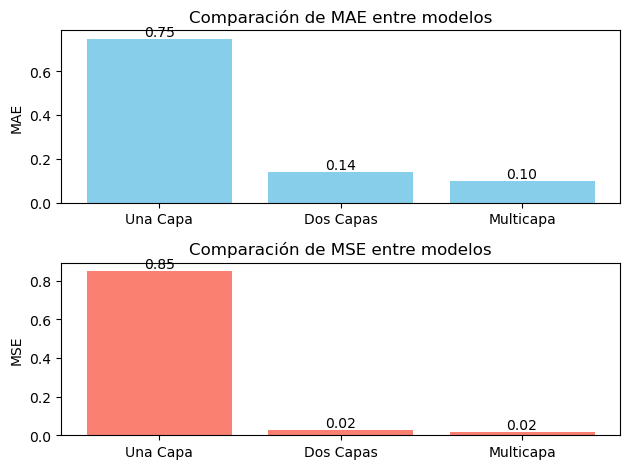

In [16]:
# Celda 4

# Datos de MAE y MSE para cada modelo
mae_values = [mae_unacapa, mae_doscapas, mae_multicapa]
mse_values = [mse_unacapa, mse_doscapas, mse_multicapa]

# Etiquetas para los modelos
models = ['Una Capa', 'Dos Capas', 'Multicapa']

# Crear subplots para MAE y MSE
fig, axs = plt.subplots(2)

# Graficar MAE
bars1 = axs[0].bar(models, mae_values, color='skyblue')
axs[0].set_ylabel('MAE')
axs[0].set_title('Comparación de MAE entre modelos')

# Agregar etiquetas de datos a las barras de MAE
for bar in bars1:
    height = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, height, '{:.2f}'.format(height),
                ha='center', va='bottom')

# Graficar MSE
bars2 = axs[1].bar(models, mse_values, color='salmon')
axs[1].set_ylabel('MSE')
axs[1].set_title('Comparación de MSE entre modelos')

# Agregar etiquetas de datos a las barras de MSE
for bar in bars2:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, height, '{:.2f}'.format(height),
                ha='center', va='bottom')

# Ajustar diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


El modelo multicapa con Early Stopping y Dropout (Punto 3) muestra el mejor rendimiento en términos de MAE y MSE, lo que indica una mejor capacidad para generalizar en comparación con los otros modelos. El modelo de una capa (Punto 1) tiene el peor rendimiento, posiblemente debido a su simplicidad. El modelo de dos capas (Punto 2) muestra un rendimiento intermedio entre los otros dos modelos.